In [1]:
import pyodbc
import pandas as pd

## 1. Connectiong to the server

In [2]:
# Define connection string
conn_str = (
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=DESKTOP-B9AE8R5\SQLEXPRESS;'
    r'DATABASE=UPI_FRAD_DETECTION;'
    r'Trusted_Connection=yes;'
)

# Connect to SQL Server
try:
    conn = pyodbc.connect(conn_str)
    print("Connection successful!")
except Exception as e:
    print("Connection failed:")

Connection successful!


In [3]:
query = "SELECT * FROM INFORMATION_SCHEMA.TABLES"
upi = pd.read_sql(query, conn)
upi.head()

C:\Users\ajays\AppData\Local\Temp\ipykernel_19628\416021694.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  upi = pd.read_sql(query, conn)


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,UPI_FRAD_DETECTION,dbo,upi_transactions,BASE TABLE


In [4]:
query = """
SELECT s.name AS schema_name, t.name AS table_name
FROM sys.tables t
JOIN sys.schemas s ON t.schema_id = s.schema_id
ORDER BY s.name, t.name
"""
pd.read_sql(query, conn)

C:\Users\ajays\AppData\Local\Temp\ipykernel_19628\1383025910.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,schema_name,table_name
0,dbo,upi_transactions


### Loading to data

In [5]:
upi=pd.read_sql("select * from upi_transactions",conn)
upi.head()

C:\Users\ajays\AppData\Local\Temp\ipykernel_19628\653750667.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  upi=pd.read_sql("select * from upi_transactions",conn)


,transaction_id,timestamp,transaction_type,merchant_category,amount_INR,transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,False
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,False
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,False
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,True
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,False


## 2. EDA

In [6]:
upi.head()

,transaction_id,timestamp,transaction_type,merchant_category,amount_INR,transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,False
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,False
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,False
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,True
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,False


In [7]:
print(upi.info())
print(upi.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      250000 non-null  object        
 1   timestamp           250000 non-null  datetime64[ns]
 2   transaction_type    250000 non-null  object        
 3   merchant_category   250000 non-null  object        
 4   amount_INR          250000 non-null  int64         
 5   transaction_status  250000 non-null  object        
 6   sender_age_group    250000 non-null  object        
 7   receiver_age_group  250000 non-null  object        
 8   sender_state        250000 non-null  object        
 9   sender_bank         250000 non-null  object        
 10  receiver_bank       250000 non-null  object        
 11  device_type         250000 non-null  object        
 12  network_type        250000 non-null  object        
 13  fraud_flag          250000 no

In [8]:
upi.describe()

,timestamp,amount_INR,fraud_flag,hour_of_day
count,250000,250000.000000,250000.000000,250000.000000
mean,2024-07-01 15:57:20.438195456,1311.756036,0.001920,14.681032
min,2024-01-01 00:05:10,10.000000,0.000000,0.000000
25%,2024-04-01 15:12:57.249999872,288.000000,0.000000,11.000000
50%,2024-07-01 14:34:17,629.000000,0.000000,15.000000
75%,2024-09-30 18:13:45,1596.000000,0.000000,19.000000
max,2024-12-30 23:55:40,42099.000000,1.000000,23.000000
std,NaN,1848.059224,0.043776,5.188304


In [9]:
upi.duplicated().sum()

0

In [10]:
x=upi.select_dtypes(include='object').drop(columns=['transaction_id'])
[x[i].value_counts() for i in x.columns]

[transaction_type
 P2P             112445
 P2M              87660
 Bill Payment     37368
 Recharge         12527
 Name: count, dtype: int64,
 merchant_category
 Grocery          49966
 Food             37464
 Shopping         29872
 Fuel             25063
 Other            24828
 Utilities        22338
 Transport        20105
 Entertainment    20103
 Healthcare       12663
 Education         7598
 Name: count, dtype: int64,
 transaction_status
 SUCCESS    237624
 FAILED      12376
 Name: count, dtype: int64,
 sender_age_group
 26-35    87432
 36-45    62873
 18-25    62345
 46-55    24841
 56+      12509
 Name: count, dtype: int64,
 receiver_age_group
 26-35    87864
 18-25    62611
 36-45    62151
 46-55    24823
 56+      12551
 Name: count, dtype: int64,
 sender_state
 Maharashtra       37427
 Uttar Pradesh     30125
 Karnataka         29756
 Tamil Nadu        25367
 Delhi             24870
 Telangana         22435
 Gujarat           20061
 Andhra Pradesh    20006
 Rajasthan       

no missinig values and Duplicated values

## 3.Data Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

upi['month']=upi['timestamp'].dt.month_name()


In [12]:
upi.head()

,transaction_id,timestamp,transaction_type,merchant_category,amount_INR,transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,month
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,False,October
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,False,April
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,False,April
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,True,January
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,False,January


### Total transaction by month

In [13]:
def human_format(num):
    if num >= 1000000000:
        return f"{num/1000000000:.1f}B"
    elif num >= 1000000:
        return f"{num/1000000:.1f}M"
    elif num >= 1000:
        return f"{num/1000:.1f}K"
    else:
        return str(num)


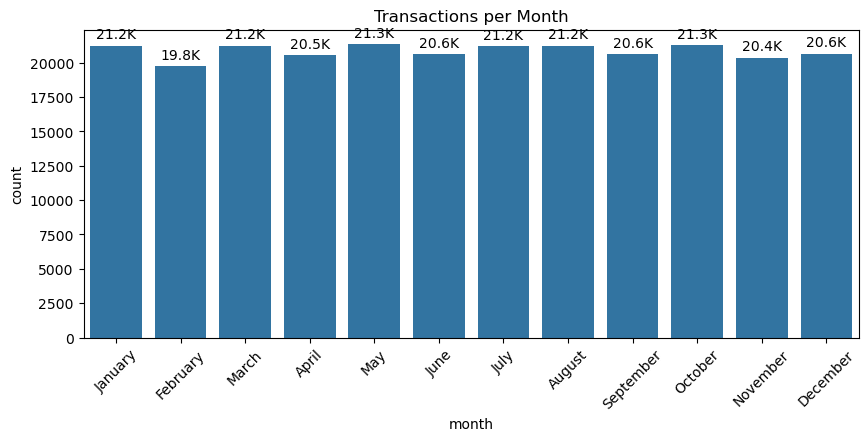

In [ ]:
plt.figure(figsize=(10,4))
order=pd.date_range('2024-01-01','2024-12-01',freq='MS').strftime('%B')
ax=sns.histplot(data=upi['month'],bins=12,order=order,kde=True,color='brown')
[ax.annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', 
              color='black', xytext=(0, 8), textcoords='offset points') for p in ax.patches]
plt.title('Transactions per Month')
plt.xticks(rotation=45)
plt.show()


### Total transacction by Hour

In [15]:
upi['transaction_status'].value_counts()

transaction_status
SUCCESS    237624
FAILED      12376
Name: count, dtype: int64

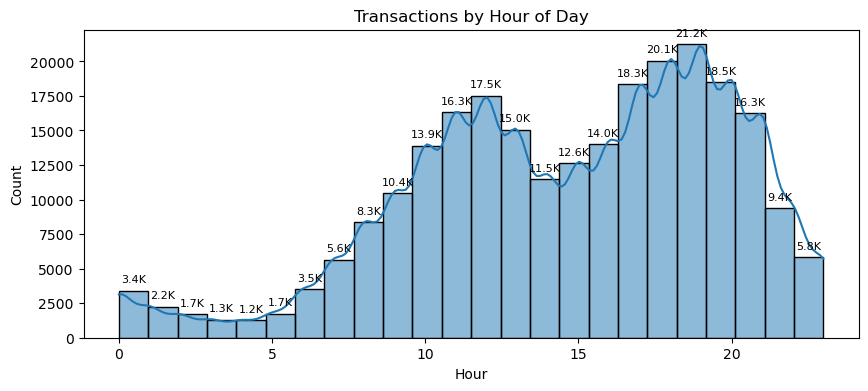

In [16]:
plt.figure(figsize=(10,4))
ax = sns.histplot(upi['hour_of_day'], bins=24, kde=True)
for p in ax.patches: #Each bar is a `matplotlib.patches.Rectangle` object stored in `ax.patches`.
    ax.annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2,p.get_height()), # get_height()` returns the **height of the bar**, i.e., the count of transactions that fall into that bin
    ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour')
plt.show()



 . `p.get_width()`

* `get_width()` gives the **width of the bar**.
* Since you used `bins=24`, each bin spans **1 unit** on the x-axis (1 hour).
* Width is important because if you want to put a label exactly at the **center** of the bar, you need `p.get_x() + p.get_width()/2.`.
---
 . `p.get_x()`
* `get_x()` gives the **x-position of the left edge** of the bar (where it starts).
* Example: For the bar representing hour 10, `get_x()` will be around 10.0.
* Adding `p.get_width()/2` moves you to the **middle** of the bar.
---
. `ax.annotate(...)`
* Places a **number label** above each bar.
* `(p.get_x() + p.get_width()/2., height)` → puts the annotation at the **center-top** of each bar.
* `xytext=(0, 8), textcoords='offset points'` → shifts the text **8 pixels upward** so it doesn’t overlap the bar edge.



### Total transaction by transaction type

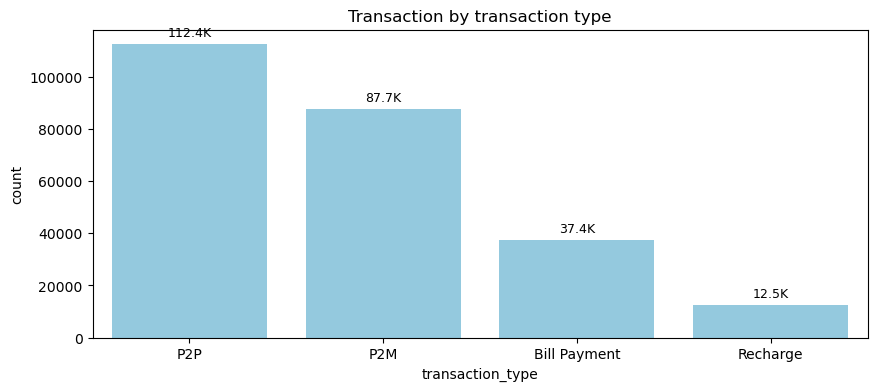

In [17]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data=upi, x='transaction_type', order=upi['transaction_type'].value_counts().index,color='skyblue')
[ax.annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=9,
                 color='black', xytext=(0, 8), textcoords='offset points') for p in ax.patches]
plt.title('Transaction by transaction type')
plt.show()

In [18]:
upi.columns

Index(['transaction_id', 'timestamp', 'transaction_type', 'merchant_category',
       'amount_INR', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend', 'month'],
      dtype='object')

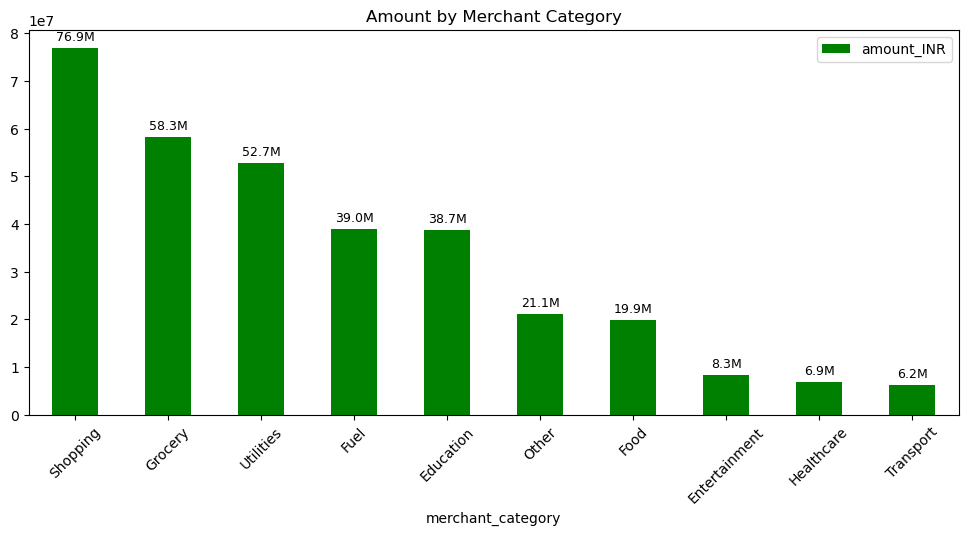

In [19]:
ch=upi.groupby('merchant_category')['amount_INR'].sum().sort_values(ascending=False).reset_index()
ax=ch.plot(kind='bar', x='merchant_category', y='amount_INR',figsize=(12,5),color='g')
[ax.annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=9,
                 color='black', xytext=(0, 8), textcoords='offset points') for p in ax.patches]
plt.xticks(rotation=45)
plt.title('Amount by Merchant Category')
plt.show()



### Sender and reciver age group transaction

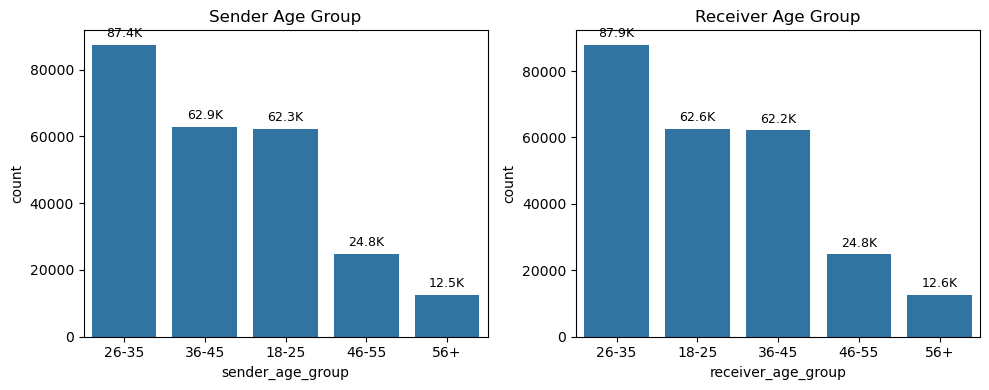

In [20]:
#sender
fig,ax = plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=upi, x='sender_age_group', ax=ax[0],order=upi['sender_age_group'].value_counts().index)
for p in ax[0].patches:
    ax[0].annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=9, color='black', xytext=(0, 8), textcoords='offset points')
ax[0].set_title('Sender Age Group')

# reciver
sns.countplot(data=upi, x='receiver_age_group', ax=ax[1],order=upi['receiver_age_group'].value_counts().index)
for p in ax[1].patches:
    ax[1].annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=9, color='black', xytext=(0, 8), textcoords='offset points')
ax[1].set_title('Receiver Age Group')
plt.tight_layout()
plt.show()

### Total transaction by sender bank

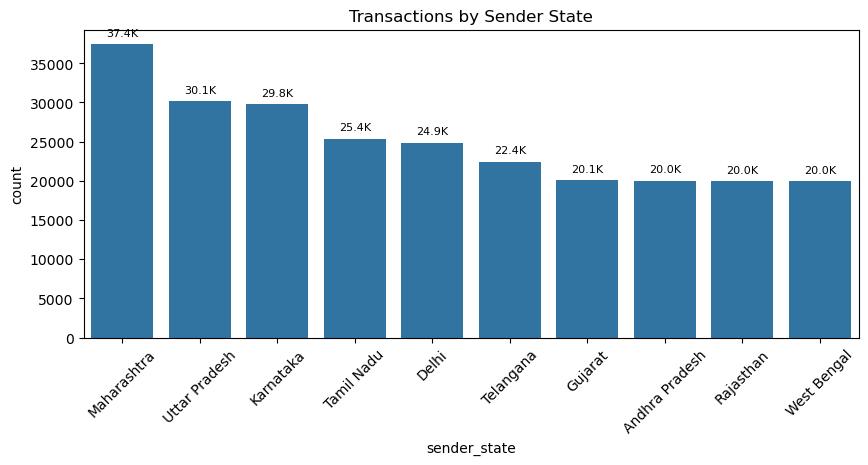

In [21]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data=upi, x='sender_state', order=upi['sender_state'].value_counts().index)
for p in ax.patches:
    ax.annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Transactions by Sender State')
plt.xticks(rotation=45)
plt.show()

In [22]:
upi['merchant_category'].value_counts().reset_index()

,merchant_category,count
0,Grocery,49966
1,Food,37464
2,Shopping,29872
3,Fuel,25063
4,Other,24828
5,Utilities,22338
6,Transport,20105
7,Entertainment,20103
8,Healthcare,12663
9,Education,7598


### Total transaction by sender and receviver bank

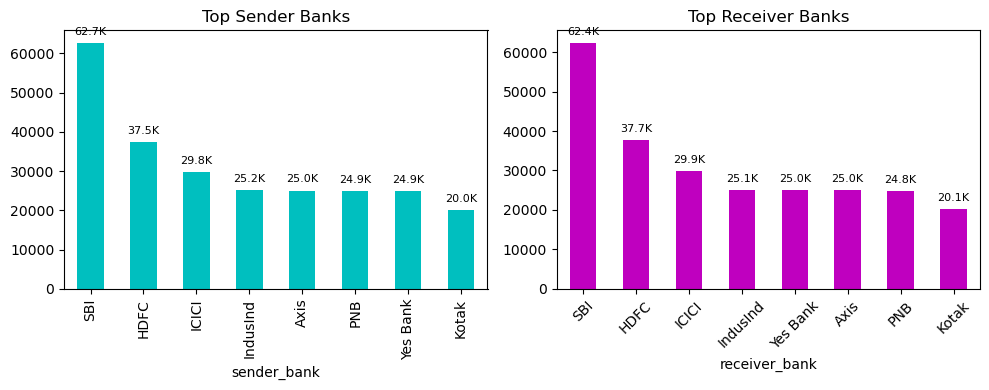

In [23]:
fig,ax=plt.subplots(1,2, figsize=(10,6))
upi['sender_bank'].value_counts().plot(kind='bar', figsize=(10,4), color='c',ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
ax[0].set_title('Top Sender Banks')
plt.xticks(rotation=45)
plt.tight_layout()
# reciver bank
upi['receiver_bank'].value_counts().plot(kind='bar', figsize=(10,4), color='m',ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
ax[1].set_title('Top Receiver Banks')
plt.xticks(rotation=45)
plt.tight_layout()


### Weekend vs weekday transaction

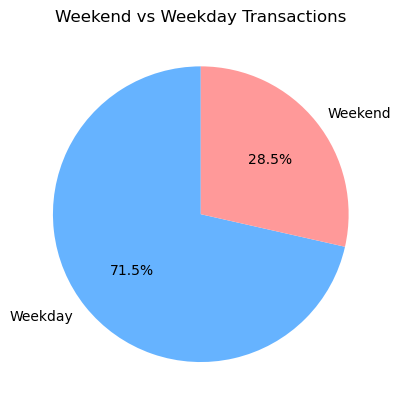

In [24]:
weekend_counts = upi['is_weekend'].value_counts().sort_index()
plt.pie(weekend_counts, labels=['Weekday','Weekend'], autopct=lambda p: '{:.1f}%'.format(p), startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Weekend vs Weekday Transactions')
plt.show()

### Fraud vs Non- fraud

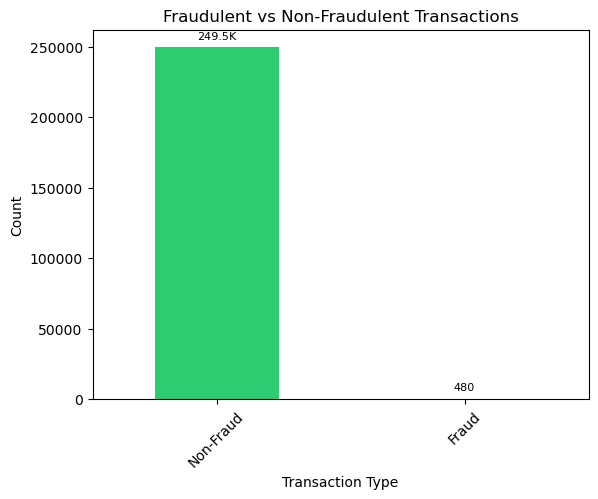

In [25]:
counts = upi['fraud_flag'].value_counts()
ax=counts.plot(kind='bar', color=['#2ecc71','#e74c3c'])
for p in ax.patches:
    ax.annotate(human_format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=45)
plt.show()

### Fraud transaction by weekend vs weekday

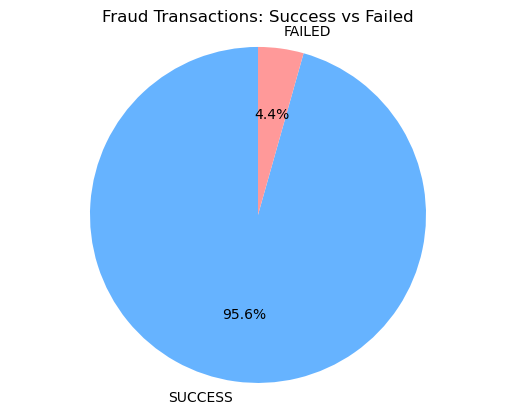

In [26]:
fraud_data = upi[upi['fraud_flag'] == 1]
fraud_counts = fraud_data['transaction_status'].value_counts()
# Plot pie chart
fig, ax = plt.subplots()
ax.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
ax.set_title('Fraud Transactions: Success vs Failed')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

### Fraud by merchant category

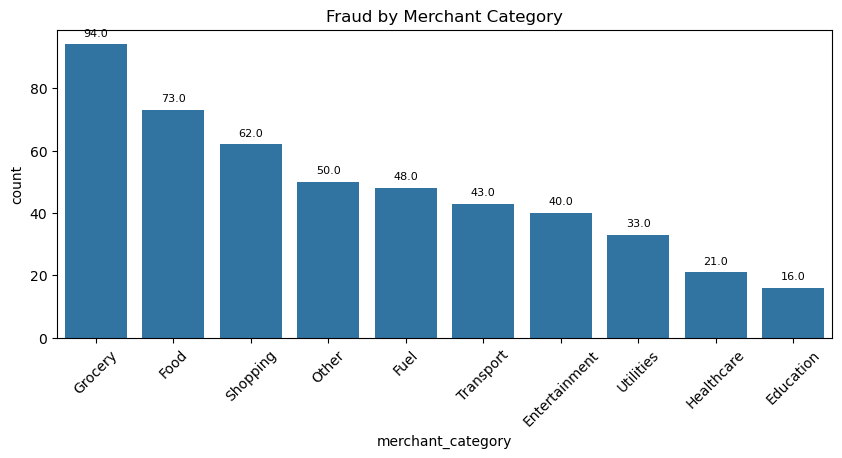

In [27]:
# Fraud by merchant category
plt.figure(figsize=(10,4))
ax = sns.countplot(data=fraud_data, x='merchant_category',order=fraud_data['merchant_category'].value_counts().index)
for p in ax.patches:
    ax.annotate(human_format(p.get_height()), (p.get_x() + p.get_width() / 2.,p.get_height()),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Fraud by Merchant Category')
plt.xticks(rotation=45)
plt.show()


### Fraud transaction by hour of day

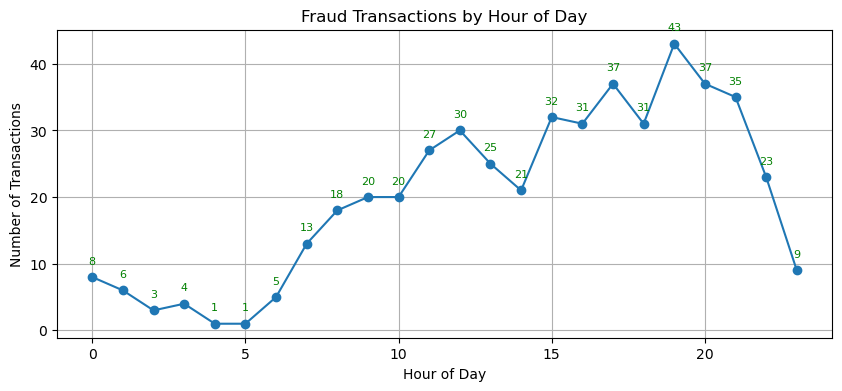

In [28]:
# Plotting
ax = fraud_data['hour_of_day'].value_counts().sort_index().plot(
    kind='line', figsize=(10, 4), marker='o'
)

# Annotating each point
counts = fraud_data['hour_of_day'].value_counts().sort_index()
for i, value in enumerate(counts):
    ax.annotate(
        human_format(value),
        (counts.index[i], value),
        ha='center', va='bottom',
        fontsize=8, xytext=(0, 8),
        textcoords='offset points',
        color='g'
    )

# Labels and title
plt.title('Fraud Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.grid(True)

### Correlation matrix

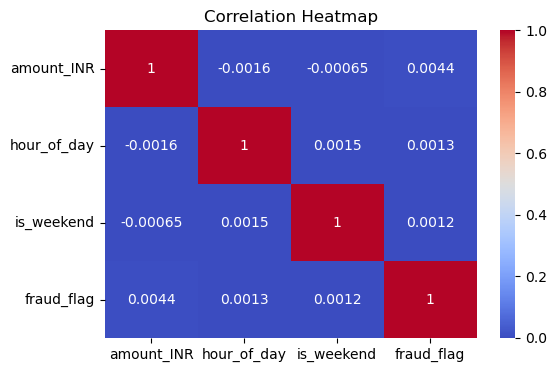

In [29]:
corr = upi[['amount_INR','hour_of_day','is_weekend','fraud_flag']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
import pandas as pd
pd.read_csv('D:\\Intership\\proj-04 Banking risk dataset\\Upi frad transaction\\upi_transactions_2024.csv').head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0


In [31]:
upi.is_weekend.value_counts().rename(index={False: 'Weekday', True: 'Weekend'})

is_weekend
Weekday    178663
Weekend     71337
Name: count, dtype: int64

In [32]:
upi["is_weekend"].dropna().unique()

array([False,  True])

In [33]:
upi[upi['fraud_flag']==1]['amount_INR'].sum()

719631

In [34]:
upi[upi['fraud_flag'] == 1]['transaction_status'].value_counts().reset_index()

,transaction_status,count
0,SUCCESS,459
1,FAILED,21
